# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return (x**2)*numpy.sin(x)

xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()


Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return 2*x*numpy.sin(x) - ((x**2)-2)*numpy.cos(x) -2 

assert g(0) == 0.
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline


def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    return g(xmax) - g(xmin)

assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    delta_x =(xmax-xmin)/N
    n = numpy.linspace(xmin, xmax, N)
    d = 0.0
    extra = (delta_x/6)*(f(xmax) + 4*f(xmax+ delta_x/2) + f(xmax + delta_x))
    def pannel(xi):
        f2 = xi + delta_x/2
        f3 = xi + delta_x
        return (delta_x/6)*(f(xi) + 4*f(f2)+f(f3))
    for i in numpy.linspace(xmin, xmax, (N+1)):
        d += pannel(i)
    return d - extra

assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Graph showing the fractional error in the Simpsons Rule as a function of the number of panels used on a logarithmic scale')

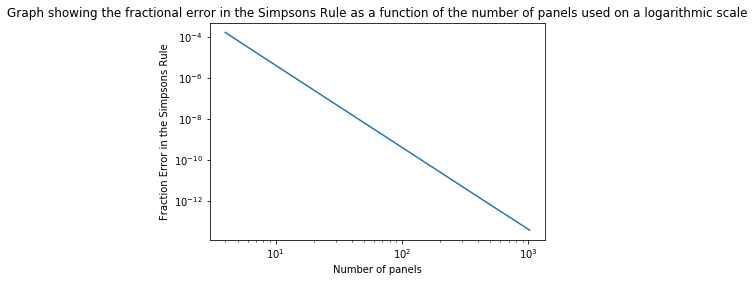

In [12]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
error = numpy.zeros(9)
for i in range(9):
    error[i] = (result_analytic - integrate_numeric(x0,x1,panel_counts[i]))/result_analytic
    
plt.loglog(panel_counts, error, basex=10, basey=10, label = 'Fraction Error in the Simpsons Rule')
plt.ylabel("Fraction Error in the Simpsons Rule")
plt.xlabel("Number of panels")
plt.title('Graph showing the fractional error in the Simpsons Rule as a function of the number of panels used on a logarithmic scale')


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As the number of panels used increases the fractional error in the numerical method decreases as the quadratic approximations are more accurate with more smaller panels. However if the number of panels used is too large, there are numerical rounding off issues numerically and the estimation loses accuracy. 


If the trapezium rule was being used, how would the panel
count affect accuracy? 

If using the trapezium rule, the larger the number of panels used the higher the accuracy numerically as the estimation would become closer to the straight line. The trapezium rule however would have a much larger error for a given amount of panels compared to the simpsons rule.